In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('df1_loan.csv')
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


#Data Cleansing

In [ ]:
df.isnull().sum()
df2 = df.dropna()
df2.shape

(390, 15)

#Remove '$' from Total Income

In [ ]:
df2['Total_Income'] = df2['Total_Income'].str.replace(r'\D', '')
df2.head()

<ipython-input-202-0b231ca6aadb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Total_Income'] = df2['Total_Income'].str.replace(r'\D', '')
<ipython-input-202-0b231ca6aadb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Income'] = df2['Total_Income'].str.replace(r'\D', '')


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,60910
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,30000
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,49410
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,60000
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,96130


In [ ]:
df3 = df2.drop(columns=['Unnamed: 0', 'Loan_ID'])
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,60910
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,30000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,49410
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,60000
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,96130


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
df3['Total_Income'] = pd.to_numeric(df3['Total_Income'])

#Exploratory Data Analysis

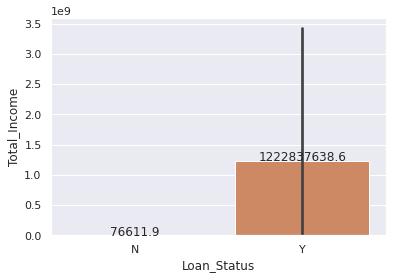

In [ ]:
p = sns.barplot(data=df3, x="Loan_Status", y="Total_Income")
show_values(p, space=0.15)

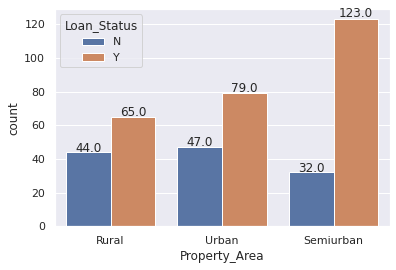

In [ ]:
p = sns.countplot(data=df3, x="Property_Area", hue="Loan_Status")
show_values(p, space=0.15)

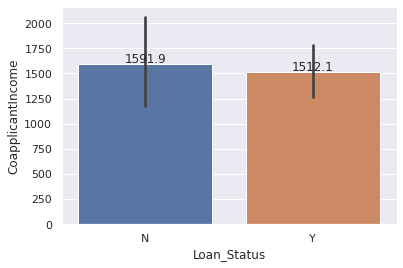

In [ ]:
p = sns.barplot(data=df3, x="Loan_Status", y="CoapplicantIncome")
show_values(p, space=0.15)

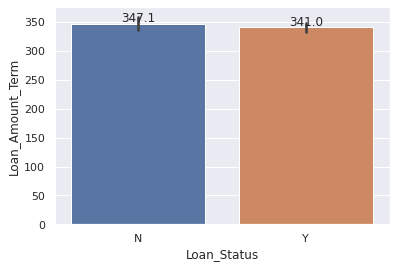

In [ ]:
p = sns.barplot(data=df3, x="Loan_Status", y="Loan_Amount_Term")
show_values(p, space=0.15)

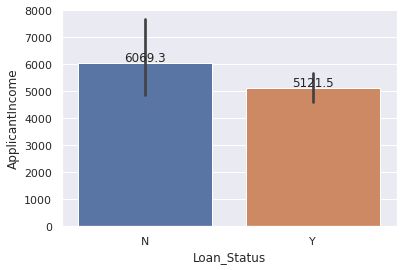

In [ ]:
p = sns.barplot(data=df3, x="Loan_Status", y="ApplicantIncome")
show_values(p, space=0.15)

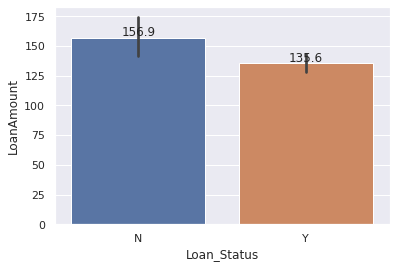

In [ ]:
p = sns.barplot(data=df3, x="Loan_Status", y="LoanAmount")
show_values(p, space=0.15)

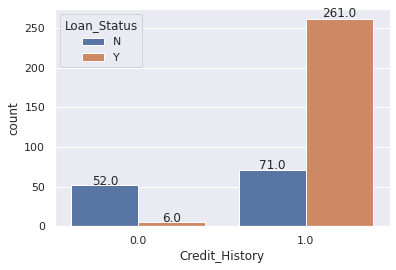

In [ ]:
p = sns.countplot(data=df3, x="Credit_History", hue="Loan_Status")
show_values(p, space=0.15)

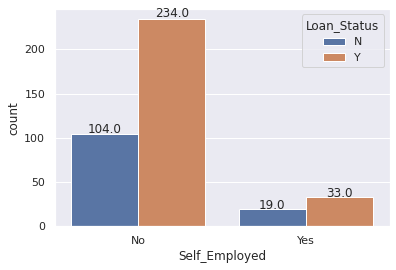

In [ ]:
p = sns.countplot(data=df3, x="Self_Employed", hue="Loan_Status")
show_values(p, space=0.15)

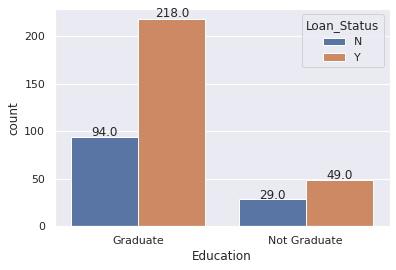

In [ ]:
p = sns.countplot(data=df3, x="Education", hue="Loan_Status")
show_values(p, space=0.15)

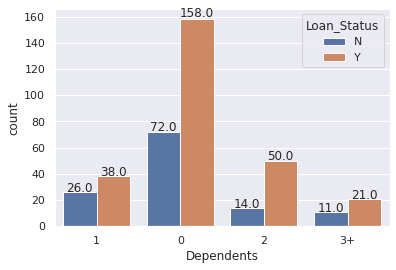

In [ ]:
p = sns.countplot(data=df3, x="Dependents", hue="Loan_Status")
show_values(p, space=0.15)

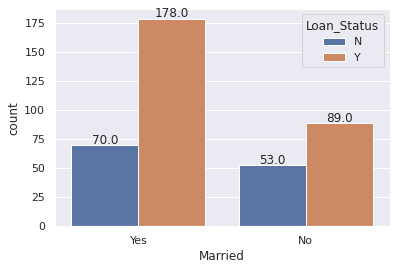

In [ ]:
p = sns.countplot(data=df3, x="Married", hue="Loan_Status")
show_values(p, space=0.15)

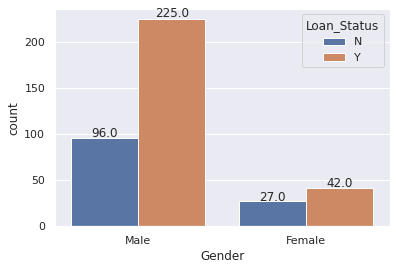

In [ ]:
p = sns.countplot(data=df3, x="Gender", hue="Loan_Status")
show_values(p, space=0.15)

In [ ]:
df3['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df3['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df3['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
df3['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
df3['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df3['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
df3['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

#Change String Value

In [ ]:
#Change value in Gender column
df3['Gender'] = df3['Gender'].replace(['Female'],'0')
df3['Gender'] = df3['Gender'].replace(['Male'],'1')
#Change value in Married column
df3['Married'] = df3['Married'].replace(['No'],'0')
df3['Married'] = df3['Married'].replace(['Yes'],'1')
#Change value in Dependents column
df3['Dependents'] = df3['Dependents'].replace(['0'],'0')
df3['Dependents'] = df3['Dependents'].replace(['1'],'1')
df3['Dependents'] = df3['Dependents'].replace(['2'],'2')
df3['Dependents'] = df3['Dependents'].replace(['3+'],'3')
#Change value in Education column
df3['Education'] = df3['Education'].replace(['Not Graduate'],'0')
df3['Education'] = df3['Education'].replace(['Graduate'],'1')
#Change value in Self_Employed column
df3['Self_Employed'] = df3['Self_Employed'].replace(['No'],'0')
df3['Self_Employed'] = df3['Self_Employed'].replace(['Yes'],'1')
#Change value in Property_Area column
df3['Property_Area'] = df3['Property_Area'].replace(['Rural'],'0')
df3['Property_Area'] = df3['Property_Area'].replace(['Urban'],'1')
df3['Property_Area'] = df3['Property_Area'].replace(['Semiurban'],'2')
#Change value in Loan_Status column
df3['Loan_Status'] = df3['Loan_Status'].replace(['N'],'0')
df3['Loan_Status'] = df3['Loan_Status'].replace(['Y'],'1')
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,60910
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,30000
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,49410
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,60000
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1,96130


In [ ]:
#convert object data types column to integer
df3['Gender'] = pd.to_numeric(df3['Gender'])
df3['Married'] = pd.to_numeric(df3['Married'])
df3['Dependents'] = pd.to_numeric(df3['Dependents'])
df3['Education'] = pd.to_numeric(df3['Education'])
df3['Self_Employed'] = pd.to_numeric(df3['Self_Employed'])
df3['Property_Area'] = pd.to_numeric(df3['Property_Area'])
df3['Loan_Status'] = pd.to_numeric(df3['Loan_Status'])
df3.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Total_Income           int64
dtype: object

1    267
0    123
Name: Loan_Status, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


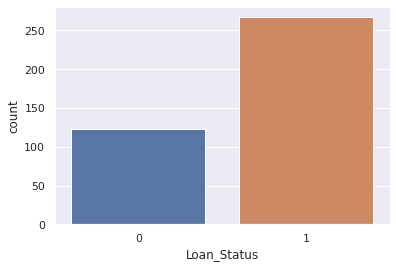

In [ ]:
sns.countplot(df3['Loan_Status'])
print(df3.Loan_Status.value_counts())

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df3[(df3['Loan_Status']==1)] 
df_minority = df3[(df3['Loan_Status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 267, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    267
1    267
Name: Loan_Status, dtype: int64


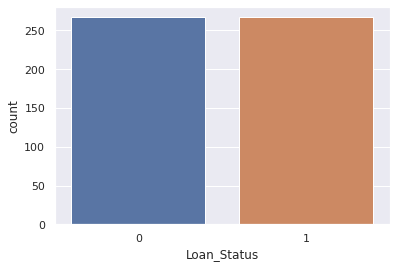

In [ ]:
#Counting 1 and 0 Value in Loan Status column
sns.countplot(df_upsampled['Loan_Status'])
print(df_upsampled.Loan_Status.value_counts())

#Outlier Detection

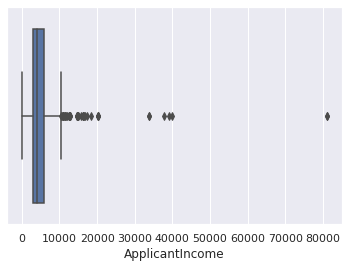

In [ ]:
sns.boxplot(x=df_upsampled["ApplicantIncome"])

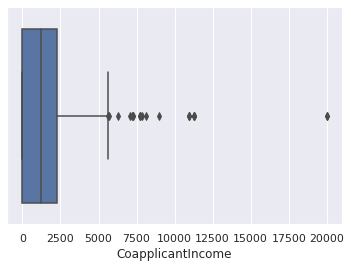

In [ ]:
sns.boxplot(x=df_upsampled["CoapplicantIncome"])

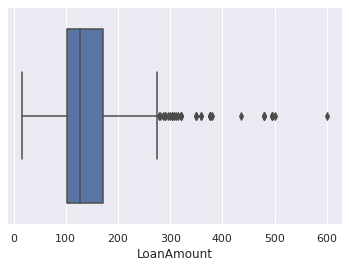

In [ ]:
sns.boxplot(x=df_upsampled["LoanAmount"])

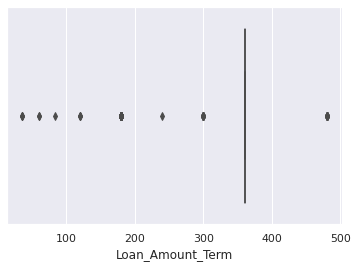

In [ ]:
sns.boxplot(x=df_upsampled["Loan_Amount_Term"])

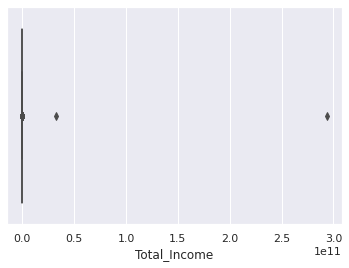

In [ ]:
sns.boxplot(x=df_upsampled["Total_Income"])

#Remove the Outlier

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(501, 13)

#Print Outlier rows

In [ ]:
df_upsampled[~df_upsampled.index.isin(data_clean.index)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
177,1,1,3,1,0,5516,11300.000000,495.0,360.0,0.0,2,0,168160
308,1,0,0,1,0,20233,0.000000,480.0,360.0,1.0,0,0,202330
262,0,0,1,1,0,3481,0.000000,155.0,36.0,1.0,2,0,34810
183,1,1,1,1,0,33846,0.000000,260.0,360.0,1.0,2,0,338460
417,1,1,2,1,1,1600,20000.000000,239.0,360.0,1.0,1,0,216000
487,1,1,1,1,0,18333,0.000000,500.0,360.0,1.0,1,0,183330
177,1,1,3,1,0,5516,11300.000000,495.0,360.0,0.0,2,0,168160
409,1,1,3,1,0,81000,0.000000,360.0,360.0,0.0,0,0,810000
183,1,1,1,1,0,33846,0.000000,260.0,360.0,1.0,2,0,338460
262,0,0,1,1,0,3481,0.000000,155.0,36.0,1.0,2,0,34810


#Data Correlation

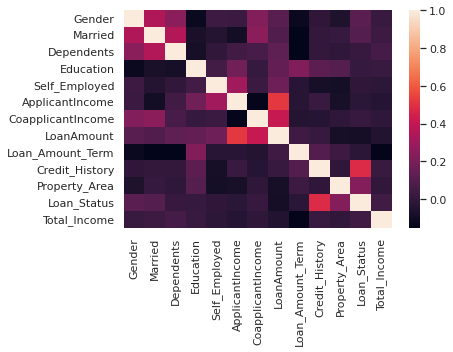

In [ ]:
sns.heatmap(data_clean.corr(), fmt='.2g')

#Correlation Between Loan Status and other attributes

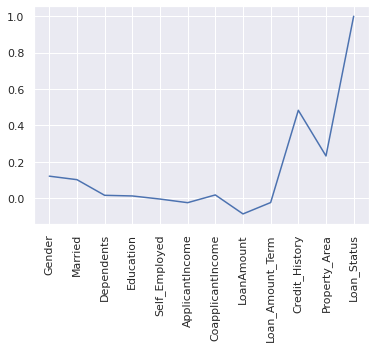

In [ ]:
corr = data_clean[data_clean.columns].corr()['Loan_Status'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

#Machine Learning Model Building

In [ ]:
X = data_clean.drop('Loan_Status', axis=1)
y = data_clean['Loan_Status']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#Decision Tree

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 72.28 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7499999999999999
Precision Score :  0.6885245901639344
Recall Score :  0.8235294117647058


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
9,Credit_History,0.414752
10,Property_Area,0.183686
11,Total_Income,0.165157
5,ApplicantIncome,0.091285
7,LoanAmount,0.086426
0,Gender,0.049339
3,Education,0.004989
2,Dependents,0.004365
1,Married,0.000000
4,Self_Employed,0.000000


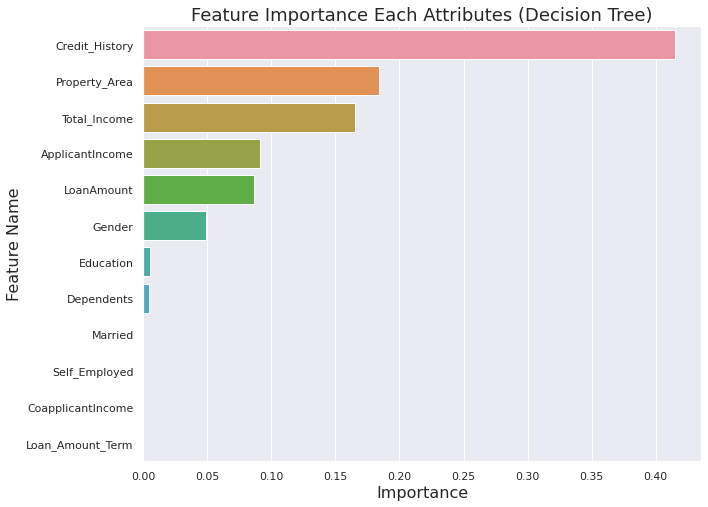

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

#Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 75.25 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7747747747747747
Precision Score :  0.7166666666666667
Recall Score :  0.8431372549019608


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
9,Credit_History,0.356088
10,Property_Area,0.131439
11,Total_Income,0.120022
7,LoanAmount,0.105489
5,ApplicantIncome,0.105455
6,CoapplicantIncome,0.049182
0,Gender,0.038338
2,Dependents,0.030127
8,Loan_Amount_Term,0.021210
1,Married,0.020146


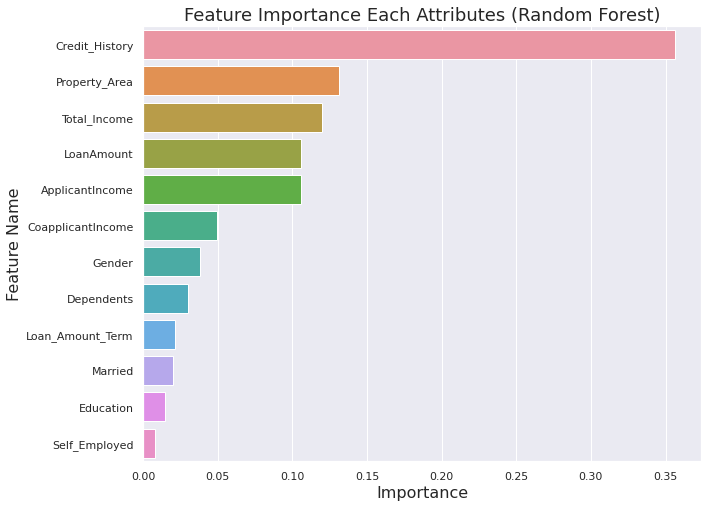

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 76.24 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7818181818181819
Precision Score :  0.7288135593220338
Recall Score :  0.8431372549019608


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
11,Total_Income,0.38
6,CoapplicantIncome,0.18
5,ApplicantIncome,0.14
7,LoanAmount,0.14
9,Credit_History,0.06
0,Gender,0.02
2,Dependents,0.02
3,Education,0.02
8,Loan_Amount_Term,0.02
10,Property_Area,0.02


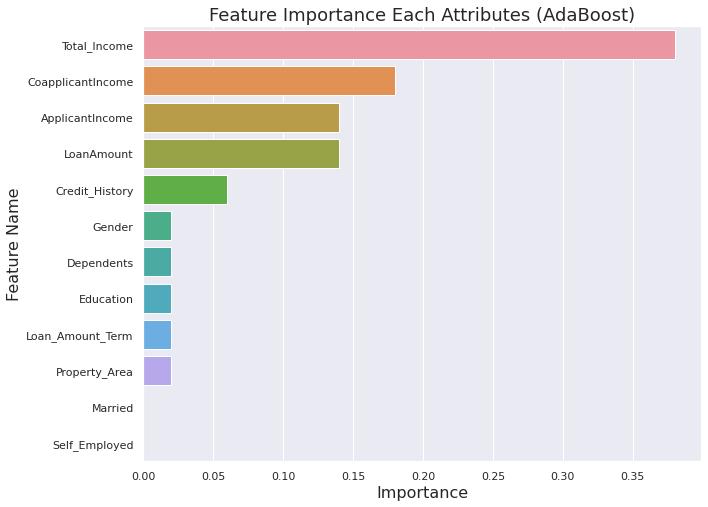

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()